<a href="https://colab.research.google.com/github/jresendiz27/CIC_AIDiploma2025/blob/main/notebooks/Tarea_1_Python_Scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea de Python



Para la siguiente tarea, vamos a implementar algunos de los pioneros sistemas de Inteligencia Artificial, que son los **árboles de decisión**. No es necesario saber mucho de IA, simplemente programar en Python.

Supongamos que es el analista principal en el sector educativo y tiene que implementar diagnósticos para el examen de admisión a universidades públicas. Hay dos instrumentos de evaluación: un examen en habilidades numéricas y otros en habilidades lingüísticas. Entonces recibe los siguientes datos preliminares:

| ID del Estudiante | Habilidades Numéricas (puntaje) | Habilidades Lingüísticas (puntaje) | Admitido |
|--------------------|---------------------------------|------------------------------------|----------|
| 001                | 85                              | 90                                 | Sí       |
| 002                | 60                              | 78                                 | No       |
| 003                | 92                              | 88                                 | Sí       |
| 004                | 70                              | 65                                 | No       |
| 005                | 80                              | 95                                 | Sí       |
| 006                | 55                              | 72                                 | No       |
| 007                | 90                              | 85                                 | Sí       |
| 008                | 67                              | 60                                 | No       |
| 009                | 78                              | 88                                 | Sí       |
| 010                | 40                              | 50                                 | No       |




**Ejercicio** (2 puntos): Convierte la tabla en formato de Pandas.

In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame

headers = ['student_id', 'numerical_skills_score', 'linguistic_skills_score', 'admitted']
preliminar_data = [
    ['001', 85, 90, True],
    ['002', 60, 78, False],
    ['003', 92, 88, True],
    ['004', 70, 65, False],
    ['005', 80, 95, True],
    ['006', 55, 72, False],
    ['007', 90, 85, True],
    ['008', 67, 60, False],
    ['009', 78, 88, True],
    ['010', 40, 50, False],
]

df = pd.DataFrame(preliminar_data, columns=headers)

**Ejercicio** (2 puntos). Utilizando Python, calcula la media de los estudiantes en cada examen que son admitidos y la media de los estudiantes en cada examen que no son admitidos.

In [ ]:
avg_admitted = df['admitted'].mean()
avg_rejected = 1 - avg_admitted
print(f"Avg Admitted: {avg_admitted * 100} %")
print(f"Avg Rejected: {avg_rejected * 100} %")

Avg Admitted: 50.0 %
Avg Rejected: 50.0 %


**Ejercicio** (1 punto): Descarga la tabla en formato CSV.

In [ ]:
from IPython.display import FileLink

FILENAME = './data.csv'
df.to_csv(FILENAME, index=False)


FileLink(FILENAME)

/home/jresendiz/Documents/CIC_AIDiploma2025/notebooks/data.csv

**Ejercicio** (2 puntos): Visualizar los datos es muy importante para el análisis exploratorio de datos. Utiliza Matplotlib para visualizar los datos. Es importante no sólo graficarlos, sino que también marcar con un color cada clase.

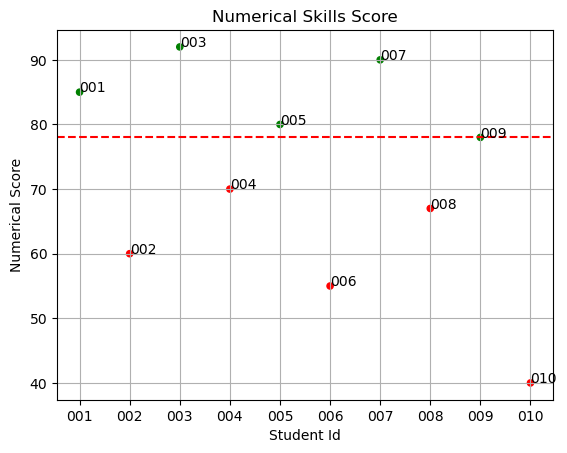

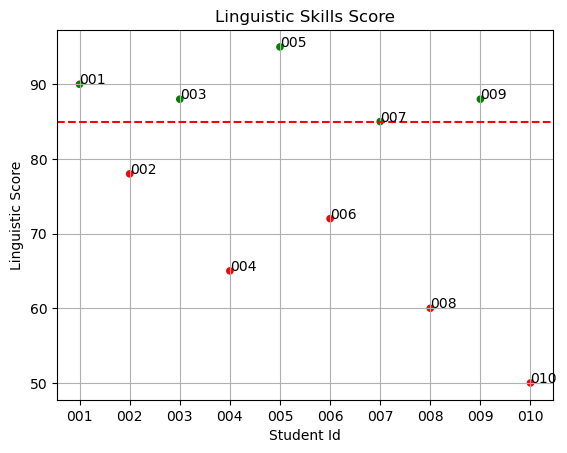

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

colors = df['admitted'].map({True: 'green', False: 'red'})
numerical_min_score = df[df['admitted'] == True]['numerical_skills_score'].min()

numerical_data = df[['student_id', 'numerical_skills_score']].plot(kind='scatter', x='student_id', y='numerical_skills_score', c=colors)
plt.title("Numerical Skills Score")
plt.xlabel("Student Id")
plt.ylabel("Numerical Score")
plt.axhline(numerical_min_score, color='red', linestyle='--', label='Min score for numerical')

for i, row in df.iterrows():
    numerical_data.annotate(row['student_id'], (row['student_id'], row['numerical_skills_score']))

plt.grid(True)
plt.show()

linguistic_data = df[['student_id', 'linguistic_skills_score']].plot(kind='scatter', x='student_id', y='linguistic_skills_score', c=colors)
linguistic_min_score = df[df['admitted'] == True]['linguistic_skills_score'].min()
plt.title("Linguistic Skills Score")
plt.xlabel("Student Id")
plt.ylabel("Linguistic Score")
plt.axhline(linguistic_min_score, color='red', linestyle='--', label='Min score for Linguistics')

for i, row in df.iterrows():
    linguistic_data.annotate(row['student_id'], (row['student_id'], row['linguistic_skills_score']))

plt.grid(True)
plt.show()


**Ejercicio** (2 puntos): Diseña varias reglas de decisión para clasificar si un alumno va a aprobar o no de acuerdo con los resultados del diagnóstico. Por ejemplo "si los alumnos obtienen más de 85 en habilidades lingüísticas aprobarán". Implementa esas reglas en una función en Python.

In [ ]:
from pandas import DataFrame

def is_going_to_pass_linguistic(data_frame: DataFrame, min_score : int=None) -> DataFrame:
    if min_score is None:
        min_score = 80
    return data_frame[data_frame['linguistic_skills_score'] >= min_score]

def is_going_to_pass_numerical(data_frame: DataFrame, min_score: int = None) -> DataFrame:
    if min_score is None:
        min_score = 80
    return data_frame[data_frame['numerical_skills_score'] >= min_score]

MIN_SCORE = 90

passed_numerical: DataFrame = is_going_to_pass_numerical(df, MIN_SCORE)
passed_linguistic: DataFrame = is_going_to_pass_linguistic(df, MIN_SCORE)

print(f"Passed Numerical with {MIN_SCORE} score: {passed_numerical['student_id'].values}")
print(f"Passed Linguistic with {MIN_SCORE} score: {passed_linguistic['student_id'].values}")

Passed Numerical with 90 score: ['003' '007']
Passed Linguistic with 90 score: ['001' '005']


**Ejercicio** (1 punto): Utiliza la función para clasificar si la persona con id 011 con resultados de 75 en ambos exámenes aprobará o no.

In [ ]:
def student_passed_both(data_frame: DataFrame, student_id: str, min_score: int = None) -> bool:
    result = data_frame[
        (data_frame['student_id'] == student_id)
        &
        (data_frame['linguistic_skills_score'] >= min_score)
        &
        (data_frame['numerical_skills_score'] >= min_score)]
    return not result.empty

STUDENT_ID = '011'
MIN_SCORE = 75

print(f"Student passed both? student_id: {STUDENT_ID}, min_score: {MIN_SCORE}, result: {student_passed_both(df, STUDENT_ID, MIN_SCORE)}")

Student passed both? student_id: 011, min_score: 75, result: False


In [27]:
import pandas as pd
df = pd.read_csv('/home/jresendiz/Downloads/202405010000TMax.csv', encoding='ISO-8859-3')
print(df.keys())
print(df.count())
mex_results = df[df['Edo'] == 'CDMX']
mex_results

Index(['Lon', 'Lat', 'Clave', 'Edo', 'Est', 'Tmax'], dtype='object')
Lon      1255
Lat      1255
Clave    1255
Edo      1255
Est      1251
Tmax     1255
dtype: int64


,Lon,Lat,Clave,Edo,Est,Tmax
110,-99.20,19.30,DATDF,CDMX,"Desviación Alta, Cd. de Méx.",26.2
111,-99.08,19.47,SJADF,CDMX,"San Juan de Aragón, Cd. de Méx.",32.0
112,-99.14,19.52,CEADF,CDMX,"Campamento Amealco, Cd. de Méx.",34.4
113,-99.20,19.27,ECOGUARDAS,CDMX,"Ecoguardas Ajusco, Cd. de Méx. SMN*",31.8
114,-99.10,19.39,TEZDF,CDMX,"Tezontle, Cd. de Méx. SMN*",31.2
115,-99.20,19.41,CTMDF,CDMX,"Observatorio de Tacubaya, Cd. de Méx.",32.7
116,-99.09,19.48,GCNDF,CDMX,"km 6+250, Cd. de Méx.",36.1
117,-99.07,19.44,MMMX,CDMX,Aeropuerto Internacional de la Ciudad de Méxic...,31.1
118,-99.22,19.44,IBMSE,CDMX,"Legaria, Cd. de Méx. SGIRPC*",31.6
119,-99.26,19.36,SFESE,CDMX,"Santa Fe, Cd. de Méx. SGIRPC*",27.4
